In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
drink = pd.read_csv("C:/Users/eric/Desktop/ML/3HW/Drink_Dataset.csv")
y=drink["class"].fillna("NaN")

In [3]:
counter_nan = drink.isnull().sum()
counter_without_nan=counter_nan[counter_nan == 0]

In [4]:
drink = drink[counter_without_nan.keys()]

In [5]:
le=LabelEncoder()
for col in drink.columns.values:
    if drink[col].dtypes == "object":
        unique_labels=np.unique(drink[col])
        le.fit(unique_labels)
        drink[col]=le.transform(drink[col])

In [6]:
le.fit(np.unique(y))
y=le.transform(y)

In [8]:
X = drink[:].values
standard_scalar = StandardScaler()
x_std = standard_scalar.fit_transform(X)

In [9]:
tsne = TSNE(n_components=2, random_state=0)
x_std_2d = tsne.fit_transform(x_std)

In [10]:
markers=('s', 'd', 'o')
color_map = {0:'red', 1:'blue', 2:'lightgreen'}

In [19]:
plt.figure()
labels = list(drink.columns[0:])

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


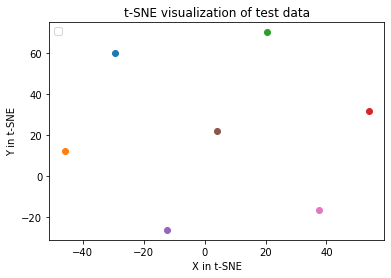

In [47]:
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_std_2d[y==cl,0], y=x_std_2d[y==cl,1])
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()